# Text Classification using Naive Bayes classifier on 20 Newsgroups Dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgrps = fetch_20newsgroups(subset='all')
newsgrps.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [2]:
news_data = newsgrps.data
categories = newsgrps.target

In [3]:
print(news_data[0])
print(categories[0], newsgrps.target_names[categories[0]])
len(news_data)

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10 rec.sport.hockey


18846

In [4]:
from tqdm.notebook import tqdm_notebook

In [5]:
from nltk.tokenize import word_tokenize

In [6]:
documents = []
for i in tqdm_notebook(range(len(news_data))):
    documents.append((word_tokenize(news_data[i]), categories[i]))
    
# documents = [(words, category), (words, category), ...] where words is an array
print(documents[0])

  0%|          | 0/18846 [00:00<?, ?it/s]

(['From', ':', 'Mamatha', 'Devineni', 'Ratnam', '<', 'mr47+', '@', 'andrew.cmu.edu', '>', 'Subject', ':', 'Pens', 'fans', 'reactions', 'Organization', ':', 'Post', 'Office', ',', 'Carnegie', 'Mellon', ',', 'Pittsburgh', ',', 'PA', 'Lines', ':', '12', 'NNTP-Posting-Host', ':', 'po4.andrew.cmu.edu', 'I', 'am', 'sure', 'some', 'bashers', 'of', 'Pens', 'fans', 'are', 'pretty', 'confused', 'about', 'the', 'lack', 'of', 'any', 'kind', 'of', 'posts', 'about', 'the', 'recent', 'Pens', 'massacre', 'of', 'the', 'Devils', '.', 'Actually', ',', 'I', 'am', 'bit', 'puzzled', 'too', 'and', 'a', 'bit', 'relieved', '.', 'However', ',', 'I', 'am', 'going', 'to', 'put', 'an', 'end', 'to', 'non-PIttsburghers', "'", 'relief', 'with', 'a', 'bit', 'of', 'praise', 'for', 'the', 'Pens', '.', 'Man', ',', 'they', 'are', 'killing', 'those', 'Devils', 'worse', 'than', 'I', 'thought', '.', 'Jagr', 'just', 'showed', 'you', 'why', 'he', 'is', 'much', 'better', 'than', 'his', 'regular', 'season', 'stats', '.', 'He', '

### Cleaning of Documents

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [8]:
from string import punctuation
stop_words.extend(list(punctuation))
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [11]:
def clean_doc(words):
    clean_words = []
    for w in words:
        if w.lower() not in stop_words and w.isalpha()==True:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_wordnet_pos(pos[0][1]))
            clean_words.append(clean_word.lower())
    
    return clean_words

In [12]:
documents = [(clean_doc(doc), cat) for doc,cat in tqdm_notebook(documents)]

  0%|          | 0/18846 [00:00<?, ?it/s]

### Frequency Distrubution of Words

In [13]:
all_words = []
for doc,cat in documents:
    all_words.extend(doc)

len(all_words)

2710486

In [14]:
from collections import Counter
words_freq = Counter(all_words).most_common()
words_freq, len(words_freq)

([('subject', 20506),
  ('lines', 18926),
  ('organization', 18864),
  ('would', 15783),
  ('one', 15046),
  ('use', 13381),
  ('writes', 13337),
  ('get', 13014),
  ('article', 11854),
  ('say', 11678),
  ('know', 10400),
  ('like', 9765),
  ('make', 9703),
  ('go', 9641),
  ('people', 9516),
  ('university', 9445),
  ('think', 8310),
  ('x', 8210),
  ('well', 8098),
  ('time', 7592),
  ('see', 7311),
  ('also', 7236),
  ('could', 6446),
  ('work', 6324),
  ('new', 6304),
  ('take', 6083),
  ('good', 5921),
  ('want', 5763),
  ('year', 5690),
  ('need', 5557),
  ('way', 5520),
  ('even', 5489),
  ('right', 5442),
  ('may', 5396),
  ('come', 5381),
  ('system', 5344),
  ('thing', 5331),
  ('u', 5313),
  ('problem', 5260),
  ('look', 5203),
  ('give', 5167),
  ('god', 5147),
  ('file', 4837),
  ('much', 4796),
  ('many', 4784),
  ('first', 4728),
  ('try', 4726),
  ('max', 4702),
  ('two', 4702),
  ('distribution', 4568),
  ('q', 4377),
  ('question', 4296),
  ('call', 4294),
  ('anyone

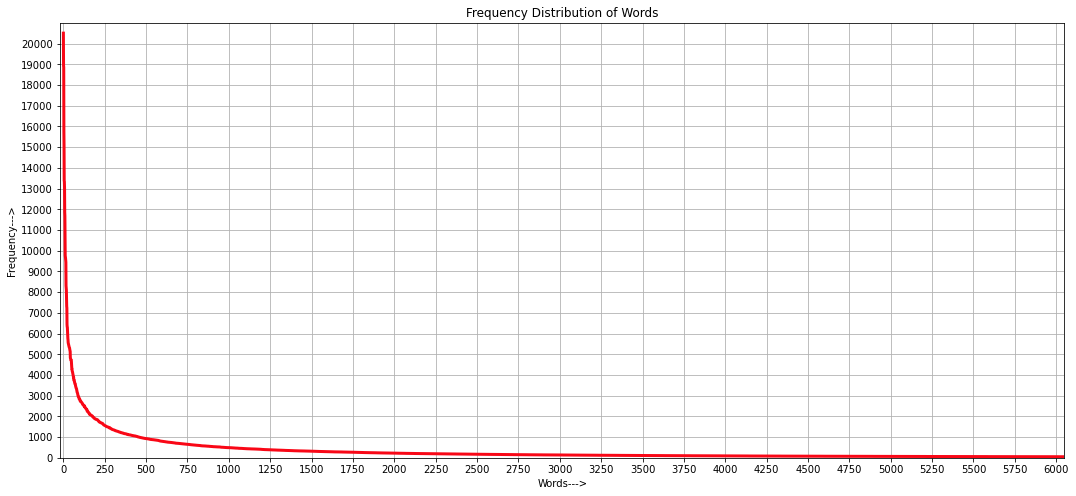

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

x_axis = np.arange(len(words_freq))
y_axis = [freq for word,freq in words_freq]
plt.plot(x_axis[0:6100], y_axis[0:6100], color="#F90716", linewidth="3.0")

plt.xlabel("Words--->")
plt.ylabel("Frequency--->")
plt.title("Frequency Distribution of Words")

plt.xticks(np.arange(0, 6100, 250))
plt.yticks(np.arange(0, 21000, 1000))
plt.axis([-20, 6050, 0, 21000])
plt.grid()

plt.show()

### Training and Testing

In [16]:
text_documents = [" ".join(doc) for doc,cat in documents]
text_documents[0]

'mamatha devineni ratnam subject pens fan reaction organization post office carnegie mellon pittsburgh pa lines sure bashers pens fan pretty confuse lack kind post recent pens massacre devils actually bit puzzle bit relieve however go put end relief bit praise pens man kill devils bad thought jagr show much well regular season stats also lot fo fun watch playoff bowman let jagr lot fun next couple game since pens go beat pulp jersey anyway disappointed see islanders lose final regular season game pens rule'

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories, random_state=11)
len(x_train), len(x_test)

(14134, 4712)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count_vec = CountVectorizer(max_features=30000, ngram_range=(1,1), max_df=0.8)
x_train_features = count_vec.fit_transform(x_train)
x_train_features

<14134x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 1227829 stored elements in Compressed Sparse Row format>

In [20]:
x_test_features = count_vec.transform(x_test)
x_test_features

<4712x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 416101 stored elements in Compressed Sparse Row format>

In [21]:
x_train_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
count_vec.get_feature_names()

['aa',
 'aaa',
 'aaaaa',
 'aab',
 'aachen',
 'aalborg',
 'aaltonen',
 'aamir',
 'aan',
 'aap',
 'aardvark',
 'aargh',
 'aarhus',
 'aario',
 'aaron',
 'aaronc',
 'aaroundpluto',
 'aarp',
 'aas',
 'aax',
 'ab',
 'abad',
 'abandon',
 'abandonment',
 'abate',
 'abbey',
 'abbott',
 'abbreviation',
 'abc',
 'abcdefghijklmnopqrstuvwxyz',
 'abd',
 'abdallah',
 'abdel',
 'abdkw',
 'abdomen',
 'abdominal',
 'abduct',
 'abduction',
 'abdul',
 'abdulla',
 'abdullah',
 'abe',
 'abekas',
 'abel',
 'aberdeen',
 'aberrant',
 'aberration',
 'aberystwyth',
 'abh',
 'abhijit',
 'abhor',
 'abhorrent',
 'abide',
 'abides',
 'abig',
 'abigail',
 'ability',
 'abingdon',
 'abiogenesis',
 'abject',
 'abjoern',
 'able',
 'abner',
 'abnormal',
 'abnormality',
 'abo',
 'aboard',
 'abode',
 'abolish',
 'abolition',
 'abolitionist',
 'abominable',
 'abomination',
 'abort',
 'aborted',
 'abortion',
 'abortions',
 'abou',
 'abound',
 'abovax',
 'aboyko',
 'abpsoft',
 'abraham',
 'abrams',
 'abreviations',
 'abridge',

In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_features, y_train)

MultinomialNB()

In [24]:
y_pred = mnb.predict(x_test_features)
print("Accuracy:", mnb.score(x_test_features, y_test)*100, "%")

Accuracy: 89.1553480475382 %


In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   1
    3   6]
 [  0 206   2   9   4   7   2   0   0   0   0   2   0   0   1   1   0   0
    0   1]
 [  0  11 172  41   3  16   1   0   0   1   0   0   5   0   1   0   1   0
    0   1]
 [  0   5   4 206  10   3   7   2   0   0   0   1   5   0   1   0   0   0
    0   0]
 [  0   4   0  12 217   0   6   3   0   0   0   1   4   0   0   0   0   0
    0   0]
 [  0  19   1   5   0 226   3   0   0   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   1   3  15   4   0 154   9   2   1   2   2   9   0   1   0   0   1
    2   0]
 [  0   0   0   0   1   0   5 210   1   0   0   0   1   0   0   0   1   0
    2   0]
 [  0   0   0   0   0   0   2   1 228   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   0   1   1 248   3   2   0   1   0   0   0   0
    1   0]
 [  0   0   0   0   0   1   0   1   0   2 224   0   0   0   0   1   0   0
    1   0]
 [  0   2   1   1   1   1   0   0   0   0   0 230   0   0   0   0

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       211
           1       0.77      0.88      0.82       235
           2       0.93      0.68      0.79       253
           3       0.69      0.84      0.76       244
           4       0.88      0.88      0.88       247
           5       0.88      0.89      0.88       255
           6       0.83      0.75      0.79       206
           7       0.91      0.95      0.93       221
           8       0.97      0.98      0.98       232
           9       0.98      0.96      0.97       259
          10       0.97      0.97      0.97       230
          11       0.93      0.96      0.94       240
          12       0.89      0.89      0.89       259
          13       0.97      0.96      0.97       238
          14       0.95      0.96      0.96       254
          15       0.90      0.94      0.92       262
          16       0.86      0.94      0.90       245
          17       0.98    